# Movie Reviews Classification
  * Positive
  * Neutral
  * Negative

# Getting The Data

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
%cp "/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/data_collection/retrive_raw_corpus_full_data.csv" "/content"

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data_df = pd.read_csv('retrive_raw_corpus_full_data.csv')
# data_df = data_df.drop(columns=[data_df.columns[0]])
data_df

,Review,Rate,Label
0,"Detective Batman at its peak! Great storyline. Just as dark a universe as we've come to expect from DC. The gloomy, gritty, dark tone of this film is exactly what I wanted. When you think the movi...",9,positive
1,"I just got out of The BatmanThis movie really won't be for everyone!! Easily the darkest Batman movie yet. It is gritty, depressing and not a fun movie at all.This isn't your usual comic book movi...",8,positive
2,"The Riddler(Paul Dano, spot-on. How did it take this long for him to get a role like this?) targets public officials, revealing their corruption, and killing them in gruesome fashion(how did this ...",9,positive
3,"A serial killer strikes in Gotham City, killing important political figures, and leaving behind a series of cryptic clues, only Batman can stop him.It's certainly very different to all previous Ba...",7,positive
4,"Matt Reeves The Batman is a hell of a movie, it is the darkest live action Batman movie ever made, and the longest one too, The Batman fills with a top notch action sequence that not only exciting...",9,positive
...,...,...,...
73982,"I like the English male actor from other films. Its not terrible. Definitely a low budget suspense movie. Not really memorable, perhaps theres too many of these out at once. It starts out really q...",3,negative
73983,Good movie but too slow but it is effective in some parts it is a super movie but lacks some good acting from the actors but is watchable.,4,neutral
73984,Fans of heavy CGI demonic possession scenes won't like this but what it lacks in explicit gore it makes up for in the sinister and uncanny.Hellraiser it isn't but what we do have is an unsettling ...,6,neutral
73985,"I've been watching horror for years. This is no horror movie. To be honest, this isn't much. I hate writing bad reviews. It hurts that part in me that loves nearly everthing art including bad movi...",1,negative


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73987 entries, 0 to 73986
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  73987 non-null  object
 1   Rate    73987 non-null  int64 
 2   Label   73987 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# import numpy as np

# # Điều kiện và các giá trị tương ứng
# conditions = [data_df['Rate'] <= 3, (data_df['Rate'] > 3) & (data_df['Rate'] < 7), data_df['Rate'] >= 7]
# values = [0, 1, 2]

# # Sử dụng np.select() để áp dụng điều kiện và tạo cột mới 'Label'
# data_df['Label'] =  np.select(conditions, values)
# data_df

In [ ]:
label_counts = data_df['Label'].value_counts()
label_counts = label_counts.sort_index(ascending=False)
label_counts

positive    25424
neutral     21867
negative    26696
Name: Label, dtype: int64

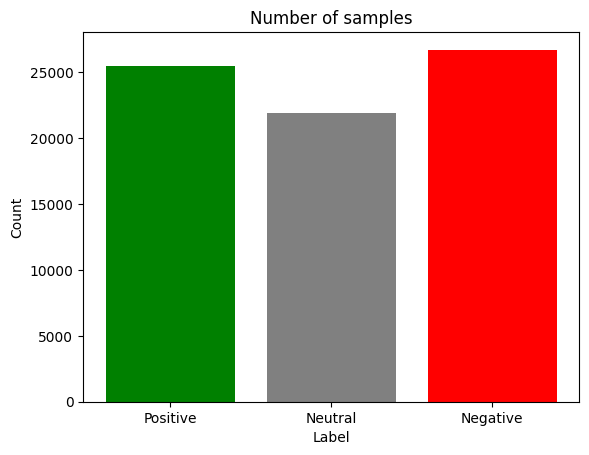

In [ ]:
import matplotlib.pyplot as plt

plt.bar(label_counts.index, label_counts.values, tick_label=['Positive', 'Neutral', 'Negative'], color=['green', 'gray', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of samples')
plt.show()

# Cleaning The Data

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in round  brackets, remove new line character, remove punctuation and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'[·–‘’“”…]', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text.strip()

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Review': data_df['Review'].apply(round1), 'Rate': data_df['Rate'], 'Label': data_df['Label']})
data_clean

,Review,Rate,Label
0,detective batman at its peak great storyline just as dark a universe as weve come to expect from dc the gloomy gritty dark tone of this film is exactly what i wanted when you think the movie is ov...,9,positive
1,i just got out of the batmanthis movie really wont be for everyone easily the darkest batman movie yet it is gritty depressing and not a fun movie at allthis isnt your usual comic book movie its a...,8,positive
2,the riddler targets public officials revealing their corruption and killing them in gruesome fashion in order to stop him it will be necessary for the bat and the cat together to stop the rat than...,9,positive
3,a serial killer strikes in gotham city killing important political figures and leaving behind a series of cryptic clues only batman can stop himits certainly very different to all previous batman ...,7,positive
4,matt reeves the batman is a hell of a movie it is the darkest live action batman movie ever made and the longest one too the batman fills with a top notch action sequence that not only exciting bu...,9,positive
...,...,...,...
73982,i like the english male actor from other films its not terrible definitely a low budget suspense movie not really memorable perhaps theres too many of these out at once it starts out really quite ...,3,negative
73983,good movie but too slow but it is effective in some parts it is a super movie but lacks some good acting from the actors but is watchable,4,neutral
73984,fans of heavy cgi demonic possession scenes wont like this but what it lacks in explicit gore it makes up for in the sinister and uncannyhellraiser it isnt but what we do have is an unsettling sto...,6,neutral
73985,ive been watching horror for years this is no horror movie to be honest this isnt much i hate writing bad reviews it hurts that part in me that loves nearly everthing art including bad movies but ...,1,negative


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def clean_text_round2(text):
    '''Remove stop words'''
    # Create a regex pattern to match stop words
    pattern = r'\b(?:' + '|'.join(map(re.escape, stopwords.words('english'))) + r')\b'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Review': data_clean['Review'].apply(round2), 'Rate': data_clean['Rate'], 'Label': data_clean['Label']})
data_clean

,Review,Rate,Label
0,detective batman peak great storyline dark universe weve come expect dc gloomy gritty dark tone film exactly wanted think movie theres beautiful cinematography great score,9,positive
1,got batmanthis movie really wont everyone easily darkest batman movie yet gritty depressing fun movie allthis isnt usual comic book movie detective movie common previous batman movies first two th...,8,positive
2,riddler targets public officials revealing corruption killing gruesome fashion order stop necessary bat cat together stop rat thanks matti really think needed yet another film dealing bruce waynes...,9,positive
3,serial killer strikes gotham city killing important political figures leaving behind series cryptic clues batman stop himits certainly different previous batman films definitely dark atmospheric p...,7,positive
4,matt reeves batman hell movie darkest live action batman movie ever made longest one batman fills top notch action sequence exciting cinematic cinematography incredible michael giacchino batman th...,9,positive
...,...,...,...
73982,like english male actor films terrible definitely low budget suspense movie really memorable perhaps theres many starts really quite wellthe actors save bad strange things happen changing guy sort...,3,negative
73983,good movie slow effective parts super movie lacks good acting actors watchable,4,neutral
73984,fans heavy cgi demonic possession scenes wont like lacks explicit gore makes sinister uncannyhellraiser isnt unsettling story depicts evil really looks like ordinary manthe idea simple one human t...,6,neutral
73985,ive watching horror years horror movie honest isnt much hate writing bad reviews hurts part loves nearly everthing art including bad movies movie rare echelon bad wastes actual sanctity life dont ...,1,negative


In [ ]:
import nltk
nltk.download('wordnet')
wnet = nltk.stem.WordNetLemmatizer()

def lemmtization(text):
    '''Lemmtization'''
    words = text.split(' ')
    lemmatized_words = [wnet.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

lem = lambda x: lemmtization(x)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Review': data_clean['Review'].apply(lem), 'Rate': data_clean['Rate'], 'Label': data_clean['Label']})
data_clean

,Review,Rate,Label
0,detective batman peak great storyline dark universe weve come expect dc gloomy gritty dark tone film exactly wanted think movie there beautiful cinematography great score,9,positive
1,got batmanthis movie really wont everyone easily darkest batman movie yet gritty depressing fun movie allthis isnt usual comic book movie detective movie common previous batman movie first two thi...,8,positive
2,riddler target public official revealing corruption killing gruesome fashion order stop necessary bat cat together stop rat thanks matti really think needed yet another film dealing bruce wayne al...,9,positive
3,serial killer strike gotham city killing important political figure leaving behind series cryptic clue batman stop himits certainly different previous batman film definitely dark atmospheric pitch...,7,positive
4,matt reef batman hell movie darkest live action batman movie ever made longest one batman fill top notch action sequence exciting cinematic cinematography incredible michael giacchino batman theme...,9,positive
...,...,...,...
73982,like english male actor film terrible definitely low budget suspense movie really memorable perhaps there many start really quite wellthe actor save bad strange thing happen changing guy sort idea...,3,negative
73983,good movie slow effective part super movie lack good acting actor watchable,4,neutral
73984,fan heavy cgi demonic possession scene wont like lack explicit gore make sinister uncannyhellraiser isnt unsettling story depicts evil really look like ordinary manthe idea simple one human taken ...,6,neutral
73985,ive watching horror year horror movie honest isnt much hate writing bad review hurt part love nearly everthing art including bad movie movie rare echelon bad waste actual sanctity life dont know d...,1,negative


In [ ]:
data_pos = data_clean[data_clean['Label'] == 'positive']
list_pos = ' '.join(list(data_pos['Review'])).split(' ')
data_neu = data_clean[data_clean['Label'] == 'neutral']
list_neu = ' '.join(list(data_neu['Review'])).split(' ')
data_neg = data_clean[data_clean['Label'] == 'negative']
list_neg = ' '.join(list(data_neg['Review'])).split(' ')

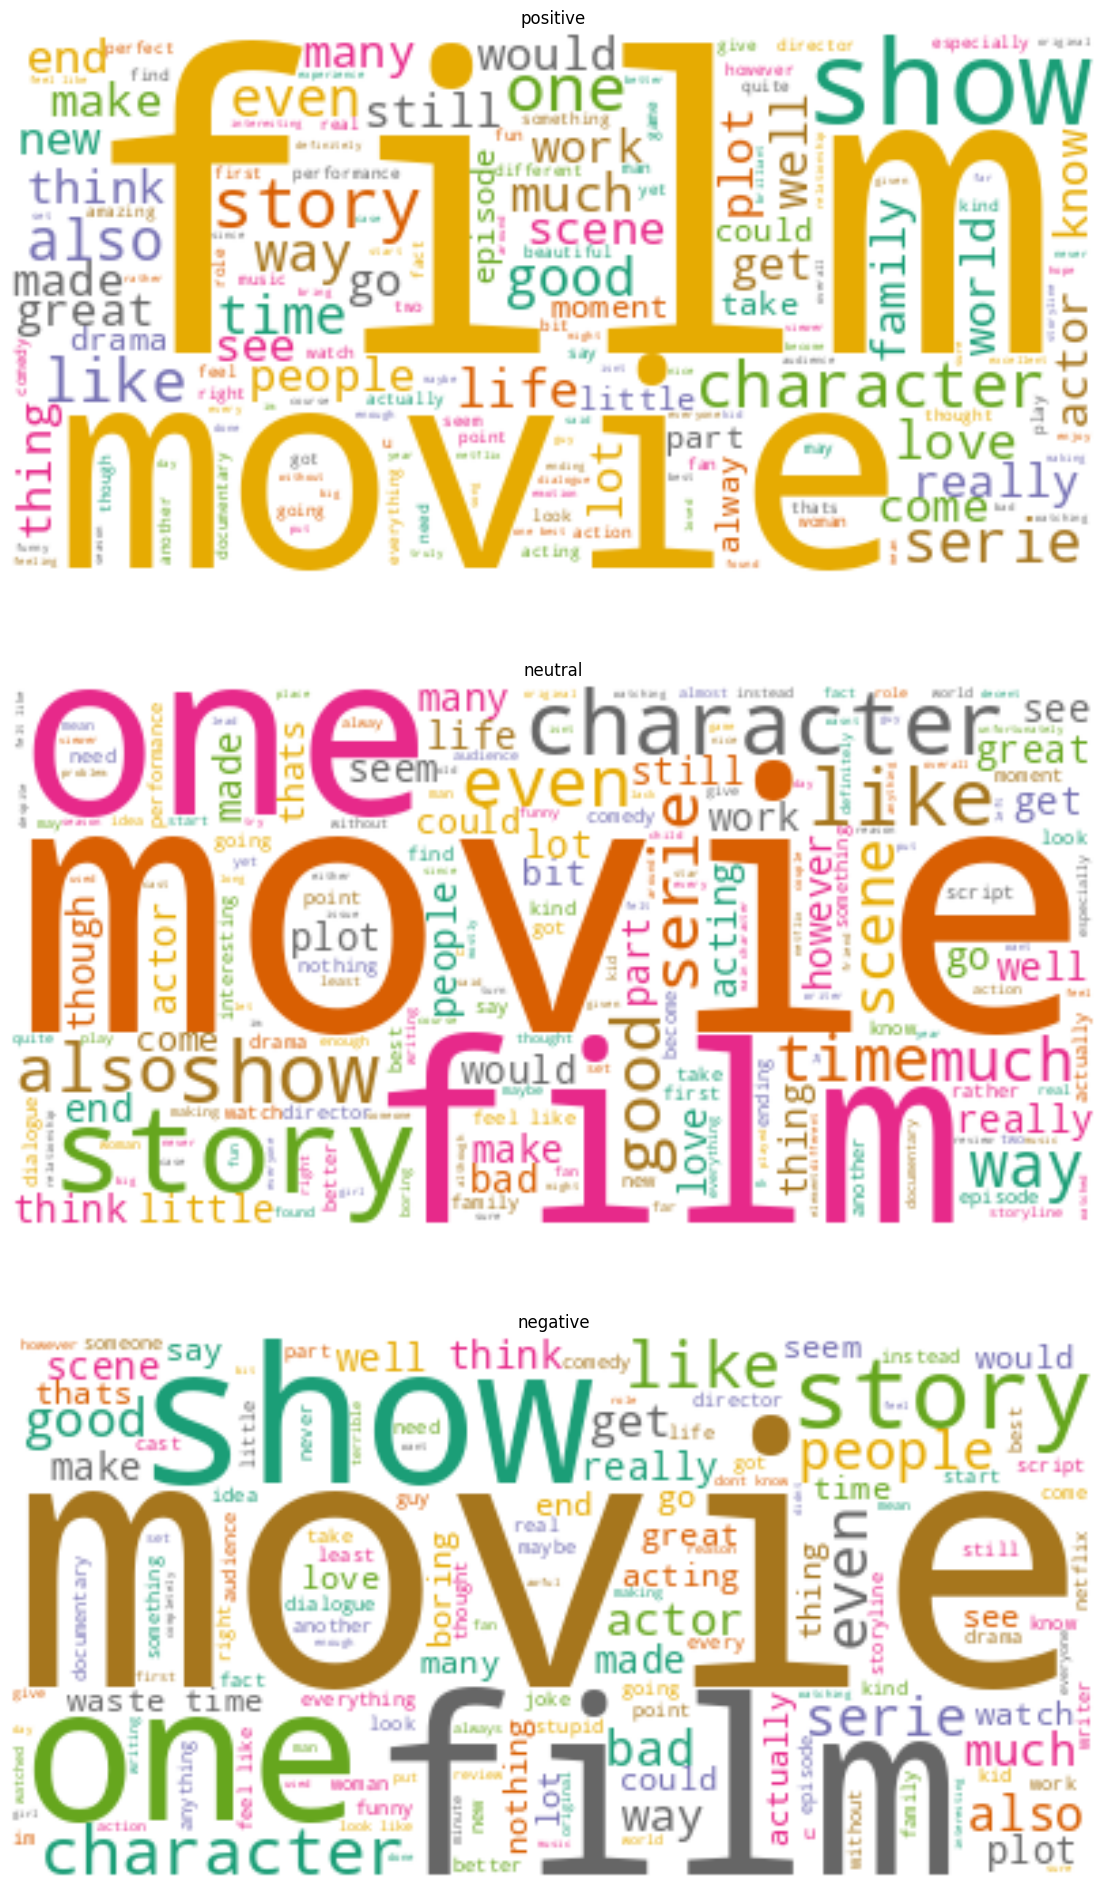

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stopwords.words('english'), background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.figure(figsize=(16, 24))
data = [list_pos, list_neu, list_neg]
title = ['positive', 'neutral', 'negative']
for i in range(len(data)):
    wc.generate(' '.join(data[i]))
    plt.subplot(3, 1, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title[i])

plt.show()

**it seems like the data has some more stop words, so let's remove it**

In [ ]:
import re

add_stop_words = ['film', 'movie', 'story', 'show', 'character', 'one', 'like']

def clean_text_round3(text):
    '''Remove stop words'''
    # Create a regex pattern to match stop words
    pattern = r'\b(?:' + '|'.join(map(re.escape, add_stop_words)) + r')\b'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

round3 = lambda x: clean_text_round3(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Review': data_clean['Review'].apply(round3), 'Rate': data_clean['Rate'], 'Label': data_clean['Label']})
data_clean

,Review,Rate,Label
0,detective batman peak great storyline dark universe weve come expect dc gloomy gritty dark tone exactly wanted think there beautiful cinematography great score,9,positive
1,got batmanthis really wont everyone easily darkest batman yet gritty depressing fun allthis isnt usual comic book detective common previous batman first two third amazing point turned son said mas...,8,positive
2,riddler target public official revealing corruption killing gruesome fashion order stop necessary bat cat together stop rat thanks matti really think needed yet another dealing bruce wayne altereg...,9,positive
3,serial killer strike gotham city killing important political figure leaving behind series cryptic clue batman stop himits certainly different previous batman definitely dark atmospheric pitch narr...,7,positive
4,matt reef batman hell darkest live action batman ever made longest batman fill top notch action sequence exciting cinematic cinematography incredible michael giacchino batman theme song become fav...,9,positive
...,...,...,...
73982,english male actor terrible definitely low budget suspense really memorable perhaps there many start really quite wellthe actor save bad strange thing happen changing guy sort idea outsider hbo wa...,3,negative
73983,good slow effective part super lack good acting actor watchable,4,neutral
73984,fan heavy cgi demonic possession scene wont lack explicit gore make sinister uncannyhellraiser isnt unsettling depicts evil really look ordinary manthe idea simple human taken supernatural parasit...,6,neutral
73985,ive watching horror year horror honest isnt much hate writing bad review hurt part love nearly everthing art including bad rare echelon bad waste actual sanctity life dont know didnt take producti...,1,negative


In [ ]:
data_pos = data_clean[data_clean['Label'] == 'positive']
list_pos = ' '.join(list(data_pos['Review'])).split(' ')
data_neu = data_clean[data_clean['Label'] == 'neutral']
list_neu = ' '.join(list(data_neu['Review'])).split(' ')
data_neg = data_clean[data_clean['Label'] == 'negative']
list_neg = ' '.join(list(data_neg['Review'])).split(' ')

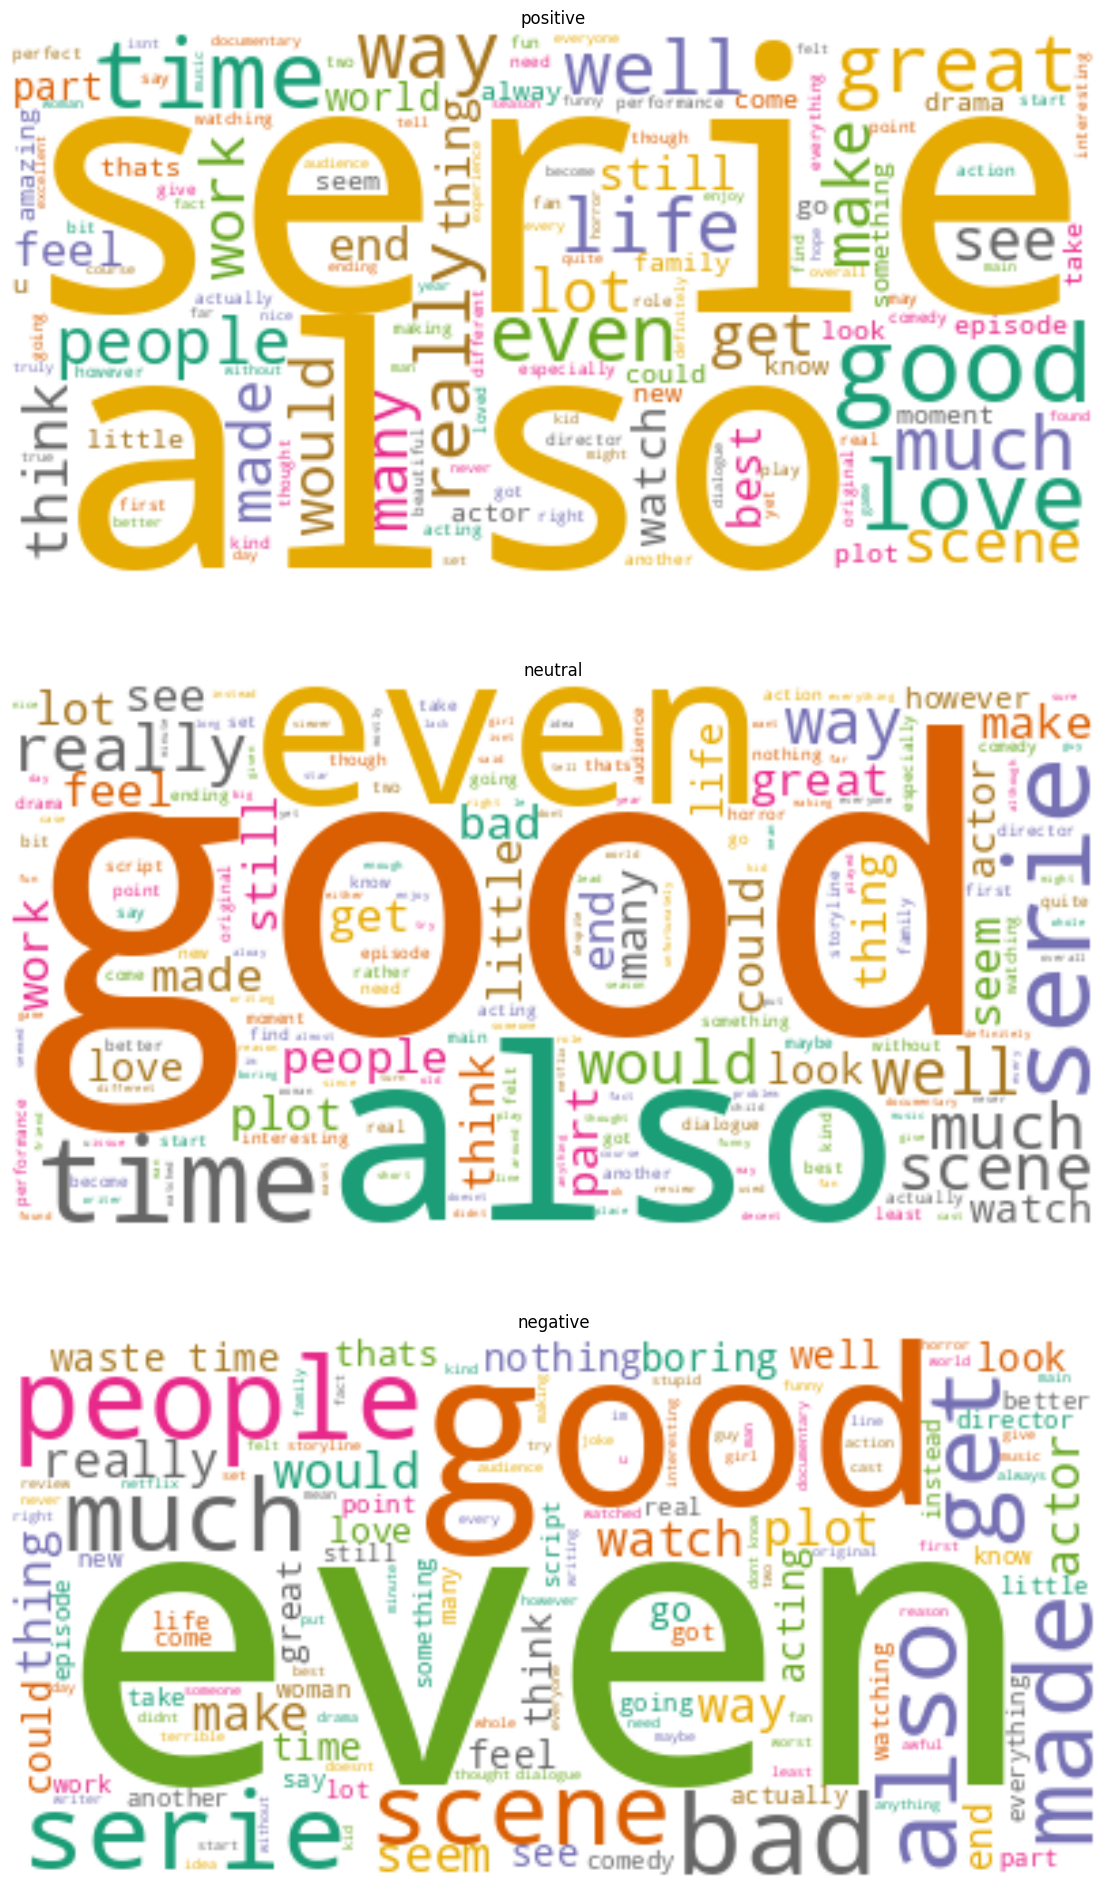

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stopwords.words('english'), background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.figure(figsize=(16, 24))
data = [list_pos, list_neu, list_neg]
title = ['positive', 'neutral', 'negative']
for i in range(len(data)):
    wc.generate(' '.join(data[i]))
    plt.subplot(3, 1, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title[i])

plt.show()

In [ ]:
# shuffe data
data_clean = data_clean.sample(frac=1, random_state=42).reset_index(drop=True)
data_clean

,Review,Rate,Label
0,ok maybe loosely based true loose ever actually actor series come across complete idiot fighting charge bumbling ever turn doesnt really sound interestingeven im take partially true would watch su...,1,negative
1,know slog along promising big reveal never deliver well go cant sleep,1,negative
2,binged first three episode honestly cant wait next week instalment great lot interesting twist finger crossed high standard maintained right episode impressive faralyla browne magnificent job play...,9,positive
3,inspection drama starring jeremy pope elli french young gay black man join marine escape abusive mother find place worldthis powerful emotional experience pope give incredible performance elli str...,8,positive
4,saw back sundance festivalthe neighbor john levi witness supernatural event los angeles apartment building realize documenting paranormal could inject fame fortune wasted life everdeeper darker ra...,7,positive
...,...,...,...
73982,love director last shin godzilla focus bureaucratic struggle well visually astonishing creature messing around actual city tokyo authenticity quite new contributes multlayered attractiveness lates...,3,negative
73983,first miniseries amazing start finish cast great matthew goode really steal robert evans god im surprised golden globe never considered nomination rare miniseries come along take back history see ...,10,positive
73984,recorded hoped see scenery glacier national park presented obvious right away wasnt glacier national park thought must canadian glacier national park much farther north along tch nope either turn ...,5,neutral
73985,saw sneak preview today wife im veteran player dm shes never played laughed whole thing riveted action sequence indicating excellent intro world dd inexperienced enchanted got right iconic monster...,9,positive


# Save data to drive

In [ ]:
import pickle

data_clean.to_pickle('/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/data/data_shuffled.pkl')